In [1]:
# Import components
import datetime as dt
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as pltw

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

df = pd.read_csv("./datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
first = 1
last = 31


def Frequency_Distribution(data, bins, class_width=None):
    data = np.asarray(data)

    #     bins = np.arange(0, 110, 10)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame(
        {
            "階級値": (bins[1:] + bins[:-1]) / 2,
            "度数": hist,
            "累積度数": cumsum,
            "相対度数": hist / cumsum[-1],
            "累積相対度数": cumsum / cumsum[-1],
        },
        index=pd.Index(
            [f"{bins[i]}以上{bins[i+1]}未満" for i in range(hist.size)], name="階級"
        ),
    )

# ターゲットのテンプレート作成

In [75]:
target = users[0]
t_T = pd.DataFrame(
    df.loc[
        (df["User"] == target)
        & (df["state"] == "ON")
        & (df["date"] > dt.datetime(2021, 12, first))
        & (df["date"] < dt.datetime(2021, 12, last))
    ]["battery"].copy()
)
t_T = t_T.set_index(np.arange(0, len(t_T)))
t_T = Frequency_Distribution(t_T, np.arange(0, 105, 5))

# ターゲットのクエリ作成

In [86]:
first_date_cand = pd.date_range("2022-01-01", "2022-02-01")
t_Q_list = []
for i in range(30):
    first_date = first_date_cand[np.random.randint(0, len(first_date_cand), 1)]
    last_date = first_date + dt.timedelta(days=30)
    t_Q = pd.DataFrame(
        df.loc[
            (df["User"] == target)
            & (df["state"] == "ON")
            & (df["date"] > first_date[0])
            & (df["date"] < last_date[0])
        ]["battery"].copy()
    )
    t_Q = t_Q.set_index(np.arange(0, len(t_Q)))
    t_Q = Frequency_Distribution(t_Q, np.arange(0, 105, 5))
    t_Q_list.append(t_Q)

# 他人のクエリ作成

In [126]:
first_date_cand = pd.date_range("2022-01-01", "2022-02-01")
i_Q_list = []
target = users[0]
imposters = users.copy()
imposters = imposters[~(imposters == target)]

for i in range(30):
    first_date = first_date_cand[np.random.randint(0, len(first_date_cand), 1)]
    last_date = first_date + dt.timedelta(days=30)
    i_Q = pd.DataFrame(
        df.loc[
            (df["User"] == np.random.choice(imposters))
            & (df["state"] == "ON")
            & (df["date"] > first_date[0])
            & (df["date"] < last_date[0])
        ]["battery"].copy()
    )
    i_Q = i_Q.set_index(np.arange(0, len(i_Q)))
    i_Q = Frequency_Distribution(i_Q, np.arange(0, 105, 5))
    i_Q_list.append(i_Q)

# 本人類似度チェック(ユークリッド距離使用)

<AxesSubplot:xlabel='階級'>

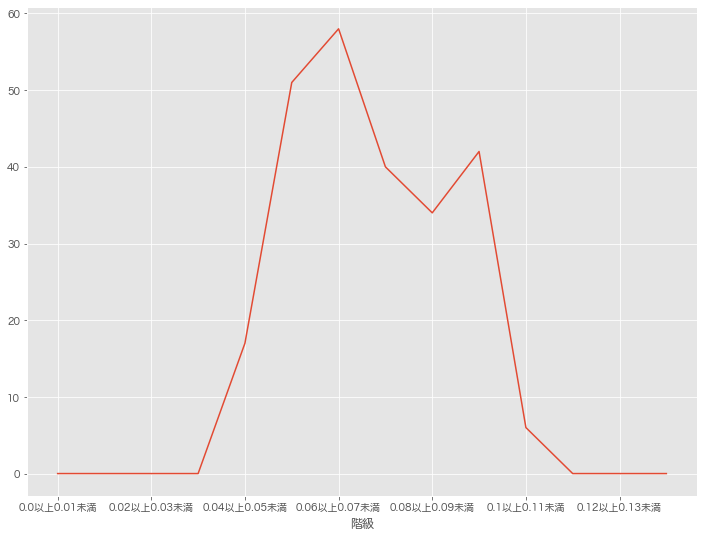

In [2]:
diff_list_gen = []
for h in range(len(users)):
    target = users[h]

    t_T = pd.DataFrame(
        df.loc[
            (df["User"] == target)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ]["battery"].copy()
    )

    t_T = t_T.set_index(np.arange(0, len(t_T)))
    t_T = Frequency_Distribution(t_T, np.arange(0, 105, 5))
    first_date_cand = pd.date_range("2022-01-01", "2022-02-01")
    t_Q_list = []

    for i in range(0, 31):
        first_date = first_date_cand[np.random.randint(0, len(first_date_cand), 1)]
        last_date = first_date + dt.timedelta(days=30)
        t_Q = pd.DataFrame(
            df.loc[
                (df["User"] == target)
                & (df["state"] == "ON")
                & (df["date"] > first_date[0])
                & (df["date"] < last_date[0])
            ]["battery"].copy()
        )
        t_Q = t_Q.set_index(np.arange(0, len(t_Q)))
        t_Q = Frequency_Distribution(t_Q, np.arange(0, 105, 5))
        t_Q_list.append(t_Q)

    for j in range(len(t_Q_list)):
        diff = 0
        for g in range(len(t_T)):
            diff += (t_T["度数"][g] - t_Q_list[j]["度数"][g]) ** 2
        diff = 1 / (math.sqrt(diff) + 1)
        diff_list_gen.append(diff)

sim_FD_gen = Frequency_Distribution(diff_list_gen, np.arange(0, 0.15, 0.01))
sim_FD_gen["度数"].plot()

# 他人類似度調査(ユークリッド距離)

<AxesSubplot:xlabel='階級'>

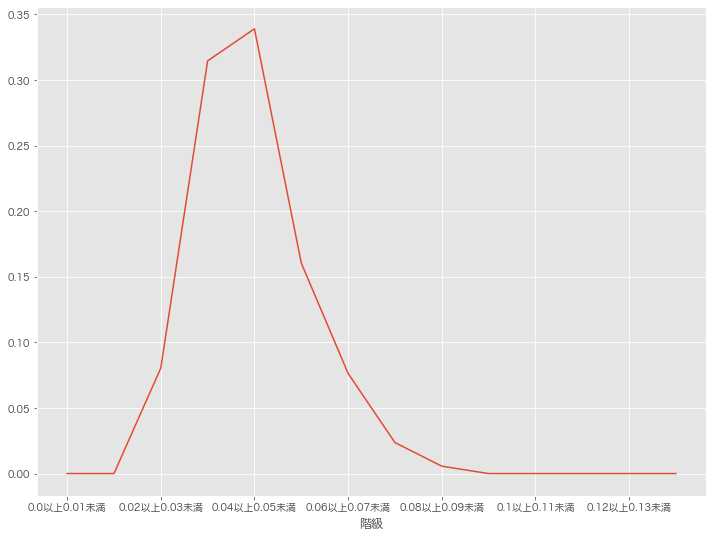

In [3]:
diff_list_im = []
for h in range(len(users)):
    target = users[h]

    t_T = pd.DataFrame(
        df.loc[
            (df["User"] == target)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ]["battery"].copy()
    )

    t_T = t_T.set_index(np.arange(0, len(t_T)))
    t_T = Frequency_Distribution(t_T, np.arange(0, 105, 5))

    first_date_cand = pd.date_range("2022-01-01", "2022-02-01")
    i_Q_list = []
    target = users[h]
    imposters = users.copy()
    imposters = imposters[~(imposters == target)]

    for i in range(30):
        first_date = first_date_cand[np.random.randint(0, len(first_date_cand), 1)]
        last_date = first_date + dt.timedelta(days=30)
        i_Q = pd.DataFrame(
            df.loc[
                (df["User"] == np.random.choice(imposters))
                & (df["state"] == "ON")
                & (df["date"] > first_date[0])
                & (df["date"] < last_date[0])
            ]["battery"].copy()
        )
        i_Q = i_Q.set_index(np.arange(0, len(i_Q)))
        i_Q = Frequency_Distribution(i_Q, np.arange(0, 105, 5))
        i_Q_list.append(i_Q)

        for j in range(len(i_Q_list)):
            diff = 0
            for g in range(len(t_T)):
                diff += (t_T["度数"][g] - i_Q_list[j]["度数"][g]) ** 2
            diff = 1 / (math.sqrt(diff) + 1)
            diff_list_im.append(diff)

sim_FD_im = Frequency_Distribution(diff_list_im, np.arange(0, 0.15, 0.01))
sim_FD_im["相対度数"].plot()

<AxesSubplot:xlabel='階級'>

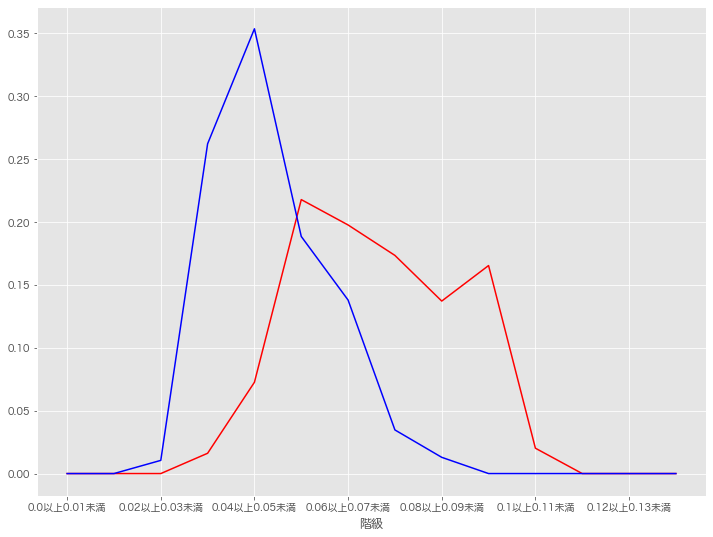

In [ ]:
sim_FD_gen["相対度数"].plot(c="r")
sim_FD_im["相対度数"].plot(c="b")

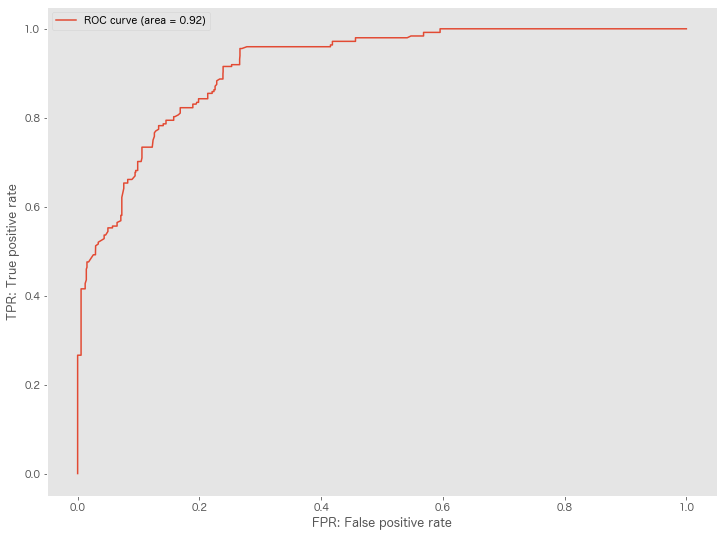

In [4]:
from sklearn import metrics

grand_truth = np.concatenate((np.ones(len(diff_list_gen)), np.zeros(len(diff_list_im))))
score = np.concatenate((diff_list_gen, diff_list_im))
fpr, tpr, threshold = metrics.roc_curve(grand_truth, score)
auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC curve (area = %.2f)" % auc)
plt.legend()
plt.xlabel("FPR: False positive rate")
plt.ylabel("TPR: True positive rate")
plt.grid()
plt.show()

0.17553763440860215


Text(0.5, 0, 'EER(days = 21) 0.17554')

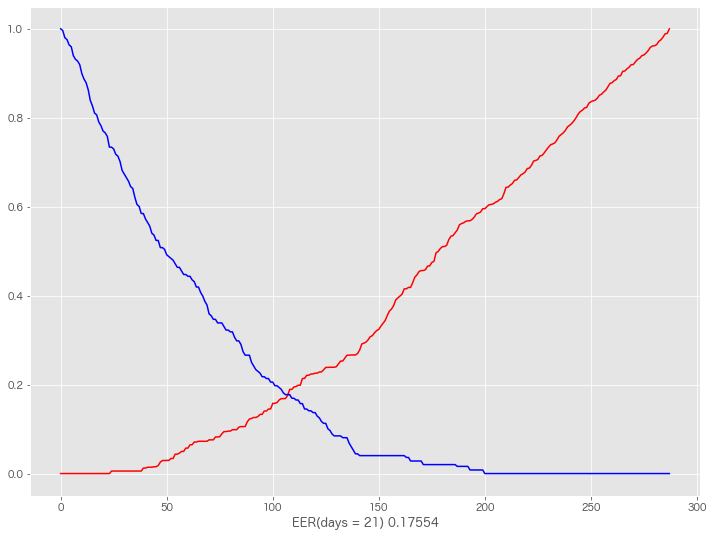

In [5]:
frr = 1.0 - tpr
eer = fpr[np.where((fpr - frr) < 0)[0][-1]]
print(eer)
plt.plot(fpr, color="red")
plt.plot(frr, color="blue")
plt.xlabel("EER(days = 21) %.5f" % eer)

0.23333333333333334


Text(0, 0.5, 'FRR')

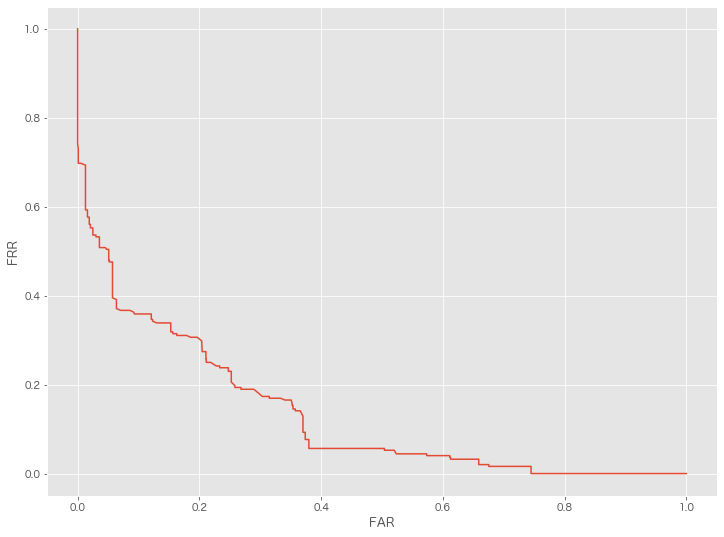

In [9]:
frr = 1.0 - tpr
eer = fpr[np.where((fpr - frr) < 0)[0][-1]]
plt.plot(fpr, frr)
print(eer)
plt.xlabel("FAR")
plt.ylabel("FRR")